<a href="https://colab.research.google.com/github/moham6839/Data-608-Story-6/blob/main/Copy_of_What_Is_The_State_of_Food_Security_and_Nutrition_in_the_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Is The State of Food Security and Nutrition in the US

In [1]:
!pip install --upgrade plotly
!pip install kaleido
!pip install Dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not ins

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import colorsys
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.tools as tls
from dash import Dash, dcc, html, Input, Output
from google.colab import files
from plotly.offline import iplot
from pandas.core.tools import numeric
import matplotlib.patches as patches

# **Loading and Preprocessing Datasets:**

In [5]:

poverty = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/poverty%20rate.csv')
data = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/whole%20US%20food%20security%20-%20Map%20Data.csv')
insufficiency = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/scarcity%20-%20Sheet1.csv')
obesity = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/obesity10-17%20-%20Sheet1.csv')
weight = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/babyweight1221%20-%20Sheet1.csv')
weight[['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']] = weight[['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']].astype(float)
wa_age = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/weight%20adjusted%20age%20group.csv')
whole = data.iloc[2:]
poverty = poverty[['Name','Percent','ABB']]
final = whole.merge(poverty,how='left',left_on='State', right_on='ABB')
final = final[['Name','ABB','Number of households (number)','Interviewed (number)','Food insecurity  Prevalence','Percent']]
final = final.rename(columns={'Name':'state','ABB':'Abbreviation','Number of households (number)':'housholds_number','Interviewed (number)':'interviewed_number','Food insecurity  Prevalence':'food_ins_pre','Percent':'poverty'})
final = final.merge(insufficiency, how ='left', left_on='state',right_on='states')
final = final.merge(obesity, how = 'left', on='state')
final['2020-21'] = final['2020-21'].astype(float)
final = final.merge(weight, how='left', on='state')
final = final.drop('week', axis = 1)

In [6]:
final.head()

,state,Abbreviation,housholds_number,interviewed_number,food_ins_pre,poverty,states,number,margin_error,percent_scarcity,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alaska,AK,"273,000","1,155",9.5,10.8,Alaska,"28,387","9,815",6.0,...,0.9,1.0,0.9,0.9,1.0,1.0,1.0,1.1,1.1,1.3
1,Alabama,AL,"2,062,000","1,806",12.4,16.3,Alabama,"483,631","108,117",14.2,...,1.9,2.1,1.9,2.0,2.0,1.9,1.9,1.9,2.0,1.8
2,Arkansas,AR,"1,290,000","1,748",16.6,16.0,Arkansas,"215,711","55,797",10.5,...,1.7,1.6,1.4,1.6,1.6,1.6,1.5,1.6,1.5,1.7
3,Arizona,AZ,"2,953,000","1,517",10.2,12.9,Arizona,"553,819","102,532",11.1,...,1.1,1.1,1.2,1.1,1.2,1.2,1.2,1.1,1.1,1.2
4,California,CA,"14,173,000","8,009",10.3,12.3,California,"2,927,941","388,961",11.4,...,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1


In [7]:
conditions_p = [
    (final['poverty'] > 17 )& (final['poverty']<=25),
    (final['poverty'] > 15) & (final['poverty'] <= 17),
    (final['poverty'] > 13) & (final['poverty'] <= 15),
    (final['poverty'] > 11) & (final['poverty'] <= 13),
    (final['poverty'] > 9) & (final['poverty'] <= 11),
    (final['poverty'] <= 9)
    ]

values_p = ['Over 17%', '15.1-17%', '13.1-15%','11.1-13%','9.1-11%' ,'Equal or Below 9%']
final['poverty_range'] = np.select(conditions_p, values_p)

In [8]:
conditions_i = [
    (final['food_ins_pre'] > 15 )& (final['food_ins_pre']<=20),
    (final['food_ins_pre'] > 13) & (final['food_ins_pre'] <= 15),
    (final['food_ins_pre'] > 11) & (final['food_ins_pre'] <= 13),
    (final['food_ins_pre'] > 9 ) & (final['food_ins_pre'] <= 11),
     (final['food_ins_pre'] > 7) & (final['food_ins_pre'] <= 9),
    (final['food_ins_pre'] <= 7)
    ]

values_i = ['Over 15%', '13.1-15%', '11.1-13%','9.1-11%','7.1-9%' ,'Equal or Below 7%']
final['insecurity_range'] = np.select(conditions_i, values_i)

# **Food Insecurity:**

In [9]:
 def set_value(row_number, assigned_value):
  return assigned_value[row_number]

 #event_dictionary = {'Over 17%':'#660066', '15.1-17%':'#800080', '13.1-15%':'#be29ec',
                                       # '11.1-13%':'#d896ff','9.1-11%':'#efbbff','Equal or Below 9%':'#E6E6FA'}

event_dictionary =  {'Over 15%':'crimson', '13.1-15%':'#800080', '11.1-13%':'#be29ec',
                                        '9.1-11%':'#d896ff','7.1-9%':'#efbbff','Equal or Below 7%':'#E6E6FA'}
final['background_colori'] = final['insecurity_range'].apply(set_value, args =(event_dictionary, ))
final['background_colori'] = final['background_colori'].apply(lambda x: mcolors.to_hex(x))

In [10]:

legend_order = ['Over 15%','13.1-15%', '11.1-13%','9.1-11%','7.1-9%','Below 7%']
fig = px.choropleth(final ,locations = "Abbreviation",
                                     color = 'insecurity_range',
                                     locationmode = 'USA-states',
                    hover_name = 'food_ins_pre', custom_data= 'Abbreviation',
                    color_discrete_map={'Over 15%':'crimson', '13.1-15%':'#800080', '11.1-13%':'#be29ec',
                                        '9.1-11%':'#d896ff','7.1-9%':'#efbbff','Equal or Below 7%':'#E6E6FA'},
                    category_orders={'insecurity_range': legend_order}
)
'''
Function for contrasting labels against background color.
'''
def calculate_luminance(hex_color):
    try:
        # Strip the '#' symbol if present and convert to lowercase
        hex_color = hex_color.lstrip('#').lower()

        # Make sure the remaining string is a valid hex color code
        if len(hex_color) == 6:
            rgb_color = tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))
            r, g, b = [x / 255.0 for x in rgb_color]
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            return v
        else:
            # Handle invalid hex color codes
            return None
    except ValueError:
        # Handle errors during conversion
        return None

fig.add_scattergeo(
    locations=final['Abbreviation'],
    locationmode="USA-states",
    text=final['Abbreviation'],
    mode='text', textfont_color=[ 'white' if calculate_luminance(bg_color) < 0.9 else 'black' for bg_color in final['background_colori']],
    textposition='bottom right',  # Arbitrary coordinates
    showlegend = False
)
fig.update_layout(geo_scope = 'usa',
                  font_family="Times New Roman",
                  font_color="black",
                  title_text = "Food Insecurity By State",
                  title_font_size = 24,
                  height=1000,  width=1600 ,
                  legend=dict(title=dict(text='Food Insecurity'), x= .9,y=.7, font_size = 18),
                  title=dict(
                      text="Food Insecurity By State",
                      xanchor='center',
                      x=0.45,
                      yref='paper',
                      yanchor='bottom',
                      y=.95,
                      pad={'b': 0},
                      font_size = 34)
)

fig.update_traces(marker_line_color='white')
fig.add_annotation(text="Texas, Louisiana, Arkansas, and Mississippi Have the Highest Rates of Food Insecurity",
                   x=.5,y=.945,
                   showarrow=False, font_size = 24 ,
                   font_color = 'crimson',
                   font_family = 'Helvetica')

fig.show()
fig.write_image("Food Insecurity By State.png")
files.download('Food Insecurity By State.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Insecurity By Gender and Age Group:**

In [11]:
wa_age1 = wa_age[wa_age['Age Group'] != 'Male']
wa_age1 = wa_age1[wa_age['Age Group']!='Female']

wa_age2 = wa_age[wa_age['Age Group'] == 'Male']
wa_age3 = wa_age[wa_age['Age Group'] =='Female']
wa_age4 = pd.concat([wa_age2, wa_age3])

<ipython-input-11-c9890df4fec3>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [12]:
fig1 = px.bar(wa_age1,
    x='Food insecure',
    y='Age Group', color = 'Age Group',
    # marker color can be a single color value or an iterable
    color_discrete_map = {'18–34':'lightgray','35–49':'crimson','50–64':'lightgray',	'≥65':'lightgray'},
    text_auto = True,)
fig1.update_layout(title=dict(
                      text='Food Insecurity by Age Group (Weight Adjusted for Age Group)',
                      xanchor='center',
                      x=0.475,
                      yref='paper',
                      yanchor='bottom',
                      y=1.0,
                      pad={'b': 0},
                      font_size = 22),
                   font_family = "Times New Roman", showlegend = False,
                  template = 'plotly_white', height =500, width = 800,xaxis_title="Percentage",
   yaxis_title="",)
fig1.add_annotation(text="People Ages 35-49 Have the Highest Rates, Followed Closely by People Ages 50-64",
                   x=14,y=3.9,
                   showarrow=False, font_size = 15 ,
                   font_color = 'crimson',
                   font_family = 'Times New Roman')
fig1.show()
fig1.write_image("Food Insecurity by Age Group.png")
files.download('Food Insecurity by Age Group.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
fig2 = px.bar(wa_age4,
              x = 'Food insecure',
              y= 'Age Group', color = 'Age Group',
              color_discrete_map = {'Male':'lightgray','Female':'crimson'},text_auto = True,)
fig2.update_layout(title=dict(
                      text='Food Insecurity By Gender (Weight Adjusted for Gender)',
                      xanchor='center',
                      x=0.45,
                      yref='paper',
                      yanchor='bottom',
                      y=1.0,
                      pad={'b': 0},
                      font_size = 22),
                   font_family = "Times New Roman", showlegend = False,
                  template = 'plotly_white', height =500, width = 800,xaxis_title="Percentage",
   yaxis_title="",)
fig2.add_annotation(text="Female Rates of Food Insecurity Far Outpace Males",
                   x=30,y=1.6,
                   showarrow=False, font_size = 15 ,
                   font_color = 'crimson',
                   font_family = 'Helvetica')

fig2.show()
fig2.write_image("Food Insecurity By Gender (Weight Adjusted for Gender).png")
files.download('Food Insecurity By Gender (Weight Adjusted for Gender).png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:

fig1 = px.bar(wa_age1,
    x='Food insecure',
    y='Age Group', color = 'Age Group',
    # marker color can be a single color value or an iterable
    color_discrete_map = {'18–34':'lightgray','35–49':'crimson','50–64':'lightgray',	'≥65':'lightgray'},
    text_auto = True,
)

fig2 = px.bar(wa_age4,
              x = 'Food insecure',
              y= 'Age Group', color = 'Age Group',
              color_discrete_map = {'Male':'lightgray','Female':'crimson'},text_auto = True,)
fig2.update_traces(marker=dict(line=dict(width=1)))
f = fig2.full_figure_for_development(warn=False)

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[1, 4])

fig.add_traces(fig2.data, 1, 1)
fig.add_traces(fig1.data, 2,1)

fig.update_layout(title_text='Food Insecuirty by Age Group and Sex', font_family = "Times New Roman", showlegend = False,
                  template = 'plotly_white', height =500, width = 800,)

fig.show()

fig.write_image("image.png")
#files.download('image.png')


In [15]:

 event_dictionary = {'Over 17%':'crimson', '15.1-17%':'#800080', '13.1-15%':'#be29ec',
                                        '11.1-13%':'#d896ff','9.1-11%':'#efbbff','Equal or Below 9%':'#E6E6FA'}

final['background_color'] = final['poverty_range'].apply(set_value, args =(event_dictionary, ))
final['background_color'] = final['background_color'].apply(lambda x: mcolors.to_hex(x))

# **Poverty**

In [16]:
legend_order = ['Over 17%', '15.1-17%', '13.1-15%','11.1-13%','9.1-11%','Equal or Below 9%']

fig = px.choropleth(final, locations = 'Abbreviation',
                    color = 'poverty_range',
                    locationmode = 'USA-states',
                    color_discrete_map={'Over 17%':'crimson', '15.1-17%':'#800080', '13.1-15%':'#be29ec',
                                        '11.1-13%':'#d896ff','9.1-11%':'#efbbff','Equal or Below 9%':'#E6E6FA'},

                    category_orders= {'poverty_range': legend_order})
def calculate_luminance(hex_color):
    try:
        # Strip the '#' symbol if present and convert to lowercase
        hex_color = hex_color.lstrip('#').lower()

        # Make sure the remaining string is a valid hex color code
        if len(hex_color) == 6:
            rgb_color = tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))
            r, g, b = [x / 255.0 for x in rgb_color]
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            return v
        else:
            # Handle invalid hex color codes
            return None
    except ValueError:
        # Handle errors during conversion
        return None

fig.add_scattergeo(
    locations=final['Abbreviation'],
    locationmode="USA-states",
    text=final['Abbreviation'],
    mode='text', textfont_color=[ 'white' if calculate_luminance(bg_color) < 0.9 else 'black' for bg_color in final['background_color']],
    textposition='bottom right',  # Arbitrary coordinates
    showlegend = False
)
fig.update_layout(
                  geo_scope = 'usa',font_family="Times New Roman",
                  title_font_family="Times New Roman",
                  title_font_color="black", font_size = 14,
                  legend_title_font_color="black",
                  height=1000,
                  width=1600 ,
                  legend=dict(title=dict(text='Poverty'),
                              font_color = 'black', x= .9,y=.7, font_size = 18),
                  title=dict(
                      text="Poverty By State",
                      xanchor='center',
                      x=0.45,
                      yref='paper',
                      yanchor='bottom',
                      y=.95,
                      pad={'b': 0},
                      font_size = 34)
)
fig.update_traces(marker_line_color='white')
fig.add_annotation(text="New Mexico, Louisiana, and Mississippi Have the Highest Poverty Rates",
                   x=.5,y=.94,
                   showarrow=False, font_size = 24 ,
                   font_color = 'crimson',
                   font_family = 'Helvetica')

fig.show()
fig.write_image("Poverty By State.png")
files.download('Poverty By State.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
ins_trend = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/instrends22%20-%20Trends.csv')


In [18]:
ins_trend.head()

,Year,Food insecurity,Very low food security
0,2001,10.7,3.3
1,2002,11.1,3.5
2,2003,11.2,3.5
3,2004,11.9,3.9
4,2005,11.0,3.9


In [20]:
fig = px.line(ins_trend, x='Year', y='Food insecurity', markers=False,labels={'x': 'X-Axis Label (Time)', 'y': 'Y-Axis Label (Sales)'})
#fig = px.scatter(ins_trend, x='Year', y='Food insecurity', trendline='ols')

fig.add_trace(go.Scatter(
    x=ins_trend['Year'],
    y=np.poly1d(np.polyfit(ins_trend['Year'], ins_trend['Food insecurity'], 1))(ins_trend['Year']),
    mode='lines',
    name='Trendline',
    line=dict(color='red', width=2, dash = 'dash')
))

fig.update_yaxes(range=[0, 20])
fig.update_layout(template='plotly_white', font_family ="Times New Roman",
                  xaxis_title='Year',
                  yaxis_title='Food Insecurity Percentage',
                  height=800,  # Set the height in pixels
    width=1000, title=dict(text='Food Insecurity Rates Sharply Increased After 2008 Financial Crisis and 2020 Pandemic', font_size=22, font_color='crimson',
                           font_family='Helvetica'))
fig.add_annotation(text="Sharp Rise",
                  x=2007,y=11.1,
                   showarrow=True, arrowsize=10, font_size = 16 , ax=30, ay=40,
                   font_color = 'crimson',
                   font_family = 'Helvetica')
fig.add_annotation(text="Sharp Rise",
                  x=2020.7,y=10.8,
                   showarrow=True, arrowhead=7, font_size = 16,
                   font_color = 'crimson',
                   font_family = 'Helvetica')
# Show the plot
fig.show()
fig.write_image("Food Insecurity Rates Sharply Increased After 2008 Financial Crisis and 2020 Pandemic.png")
files.download('Food Insecurity Rates Sharply Increased After 2008 Financial Crisis and 2020 Pandemic.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
final['poverty_ins_ratio'] = final['food_ins_pre']/final['poverty']

In [22]:
final['poverty_iny_ratio'] = final['percent_scarcity']/final['poverty']

In [23]:
final = final.sort_values(by ='poverty_ins_ratio')

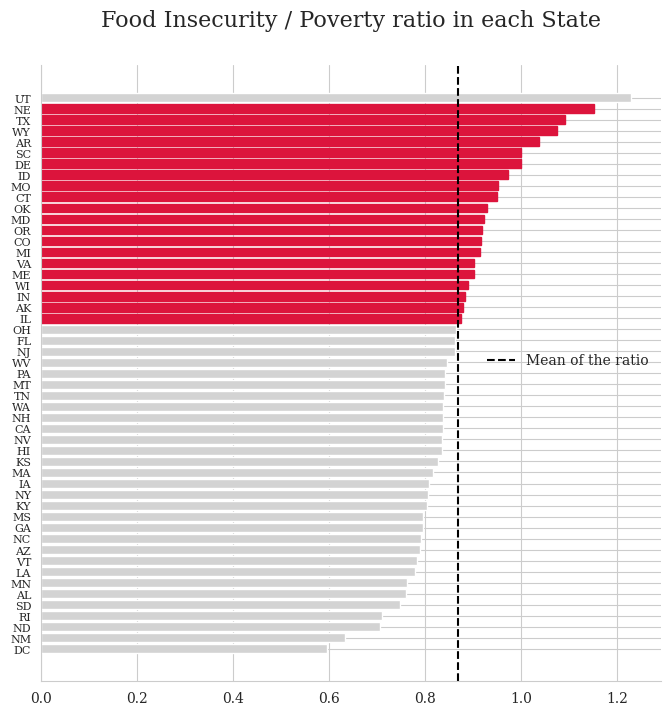

In [24]:
fig = plt.figure(figsize= (8,8))
sns.set_style("whitegrid")
bar = plt.barh(final['Abbreviation'],final['poverty_ins_ratio'], color = 'lightgray')
i = 49
while  i >= 30:
  bar[i].set_color('crimson')
  i = i-1
plt.axvline(final['poverty_ins_ratio'].mean(), label = 'Mean of the ratio', linestyle = 'dashed', color = 'black')
plt.yticks(font = "serif",fontsize =8)
plt.xticks(font = "serif",fontsize =10)
plt.legend(bbox_to_anchor=(1.0,.489),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)
#plt.text(.9,10,'Mean of the ratio', font = 'serif')
plt.title('Food Insecurity / Poverty ratio in each State', font = "serif", y = 1.05, size = 16)
sns.despine(bottom = False, left = False)
plt.show()

In [25]:
fig = px.scatter(final, x='poverty', y='food_ins_pre',
                 trendline='ols')
fig.update_yaxes(range=[0, 20])
fig.update_xaxes(range=[0, 20])


fig.update_layout(template='plotly_white', font_family = 'Times New Roman',
                  height=800,  # Set the height in pixels
                  xaxis_title='Poverty Rate',
                  yaxis_title='Food Insecurity Percentage',
    width=1000, title=dict(text='Food Insecurity Directly Correlates with Poverty', font_size=22, font_color='crimson',
                           font_family='Helvetica'))
fig.show()
fig.write_image("Food Insecurity Directly Correlates with Poverty.png")
files.download('Food Insecurity Directly Correlates with Poverty.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Obesity:**

In [26]:
conditions_i = [
    (final['2020-21'] > 40 )& (final['2020-21']<=50),
    (final['2020-21'] > 37) & (final['2020-21'] <= 40),
    (final['2020-21'] > 34) & (final['2020-21'] <= 37),
    (final['2020-21'] > 31 ) & (final['2020-21'] <= 34),
     (final['2020-21'] > 28) & (final['2020-21'] <= 31),
    (final['2020-21'] > 25) & (final['2020-21'] <= 28),
    (final['2020-21'] > 0 ) & (final['2020-21'] <= 25)
    ]

values_i = ['Over 40%', '37.1-40%', '34.1-37%','31.1-34%','28.1-31%' ,'25.1-28%','Equal or Below 25%']
final['obesity_range'] = np.select(conditions_i, values_i)

In [27]:
final = final.dropna()

In [28]:

event_dictionary = {'Over 40%':'crimson', '37.1-40%':'#800080', '34.1-37%':'#be29ec',
                                        '31.1-34%':'#d896ff','28.1-31%':'#E0B0FF','25.1-28%':'#efbbff',
                                        'Equal or Below 25%':'#E6E6FA'}

final['background_coloro'] = final['obesity_range'].apply(set_value, args =(event_dictionary, ))
final['background_coloro'] = final['background_coloro'].apply(lambda x: mcolors.to_hex(x))

In [29]:
legend_order = ['Over 40%', '37.1-40%', '34.1-37%','31.1-34%','28.1-31%' ,'25.1-28%','Equal or Below 25%']

fig = px.choropleth(final, locations = 'Abbreviation',
                    color = 'obesity_range',
                    locationmode = 'USA-states',category_orders= {'obesity_range': legend_order},
                    color_discrete_map={'Over 40%':'crimson', '37.1-40%':'#800080', '34.1-37%':'#be29ec',
                                        '31.1-34%':'#d896ff','28.1-31%':'#E0B0FF','25.1-28%':'#efbbff',
                                        'Equal or Below 25%':'#E6E6FA'},
                    hover_data=["state","2020-21", "poverty", "food_ins_pre"])
def calculate_luminance(hex_color):
    try:
        # Strip the '#' symbol if present and convert to lowercase
        hex_color = hex_color.lstrip('#').lower()

        # Make sure the remaining string is a valid hex color code
        if len(hex_color) == 6:
            rgb_color = tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))
            r, g, b = [x / 255.0 for x in rgb_color]
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            return v
        else:
            # Handle invalid hex color codes
            return None
    except ValueError:
        # Handle errors during conversion
        return None

fig.add_scattergeo(
    locations=final['Abbreviation'],
    locationmode="USA-states",
    text=final['Abbreviation'],
    mode='text', textfont_color=[ 'white' if calculate_luminance(bg_color) < 0.9 else 'black' for bg_color in final['background_coloro']],
    textposition='bottom right',
    showlegend = False
)

fig.update_layout(
                  geo_scope = 'usa',font_family="Times New Roman",
                  title_font_family="Times New Roman",
                  title_font_color="black",

                  height=1000,
                  width=1600 ,legend=dict(title=dict(text='Obesity'), x= .9,y=.7, font_size = 18),
                  title=dict(
                      text="Children and Teenage Obesity By State (Ages 10-17)",
                      xanchor='center',
                      x=0.45,
                      yref='paper',
                      yanchor='bottom',
                      y=.95,
                      pad={'b': 0},
                      font_size = 34)

    )
fig.update_traces(
marker_line_color='white')
fig.add_annotation(text="Mississippi, Kentucky, and West Virginia Have the Highest Rates of Child and Teen Obesity",
                   x=.5,y=.945,
                   showarrow=False, font_size = 24 ,
                   font_color = 'crimson',
                   font_family = 'Helvetica')
fig.show()

fig.write_image("Children and Teenage Obesity By State (Ages 10-17).png")
files.download('Children and Teenage Obesity By State (Ages 10-17).png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
adult_obese = pd.read_csv('https://raw.githubusercontent.com/Umerfarooq122/What-Is-The-State-of-Food-Security-and-Nutrition-in-the-US/main/2022-overall-prevalence%20(1).csv')

In [32]:
conditions_i = [
    (adult_obese['Prevalence'] >= 40 )& (adult_obese['Prevalence']<=50),
    (adult_obese['Prevalence'] > 37) & (adult_obese['Prevalence'] <= 39.9),
    (adult_obese['Prevalence'] > 34) & (adult_obese['Prevalence'] <= 37),
    (adult_obese['Prevalence'] > 31 ) & (adult_obese['Prevalence'] <= 34),
    (adult_obese['Prevalence'] > 28) & (adult_obese['Prevalence'] <= 31),
    (adult_obese['Prevalence'] > 25) & (adult_obese['Prevalence'] <= 28),
    (adult_obese['Prevalence'] > 0 ) & (adult_obese['Prevalence'] <= 25)
    ]

values_i = ['Equal or Over 40%', '37.1-40%', '34.1-37%','31.1-34%','28.1-31%' ,'25.1-28%','Equal or Below 25%']
adult_obese['a_obesity_range'] = np.select(conditions_i, values_i)

In [33]:
event_dictionary = {'Equal or Over 40%':'crimson', '37.1-40%':'#800080', '34.1-37%':'#be29ec',
                                        '31.1-34%':'#d896ff','28.1-31%':'#E0B0FF','25.1-28%':'#efbbff',
                                        'Equal or Below 25%':'#E6E6FA'}

adult_obese['background_colora'] = adult_obese['a_obesity_range'].apply(set_value, args =(event_dictionary, ))
adult_obese['background_colora'] = adult_obese['background_colora'].apply(lambda x: mcolors.to_hex(x))

In [34]:
final = final.merge(adult_obese, how='left',left_on="states", right_on='State')

In [35]:
legend_order = ['Equal or Over 40%', '37.1-40%', '34.1-37%','31.1-34%','28.1-31%' ,'25.1-28%','Equal or Below 25%']

fig = px.choropleth(final, locations = 'Abbreviation',
                    color = 'a_obesity_range',
                    locationmode = 'USA-states',category_orders= {'a_obesity_range': legend_order},
                    color_discrete_map={'Equal or Over 40%':'crimson', '37.1-40%':'#800080', '34.1-37%':'#be29ec',
                                        '31.1-34%':'#d896ff','28.1-31%':'#E0B0FF','25.1-28%':'#efbbff',
                                        'Equal or Below 25%':'#E6E6FA'},
                    hover_data=["state","2020-21", "poverty", "food_ins_pre"])
def calculate_luminance(hex_color):
    try:
        # Strip the '#' symbol if present and convert to lowercase
        hex_color = hex_color.lstrip('#').lower()

        # Make sure the remaining string is a valid hex color code
        if len(hex_color) == 6:
            rgb_color = tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))
            r, g, b = [x / 255.0 for x in rgb_color]
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            return v
        else:
            # Handle invalid hex color codes
            return None
    except ValueError:
        # Handle errors during conversion
        return None

fig.add_scattergeo(
    locations=final['Abbreviation'],
    locationmode="USA-states",
    text=final['Abbreviation'],
    mode='text', textfont_color=[ 'white' if calculate_luminance(bg_color) < 0.9 else 'black' for bg_color in final['background_colora']],
    textposition='bottom right',
    showlegend = False
)

fig.update_layout(
                  geo_scope = 'usa',font_family="Times New Roman",
                  title_font_family="Times New Roman",
                  title_font_color="black",

                  height=1000,
                  width=1600 ,legend=dict(title=dict(text='Obesity in Adults'), x= .9,y=.7, font_size = 18),
                  title=dict(
                      text="Adult Obesity By State",
                      xanchor='center',
                      x=0.45,
                      yref='paper',
                      yanchor='bottom',
                      y=.95,
                      pad={'b': 0},
                      font_size = 34)

    )
fig.update_traces(marker_line_color='white')
fig.add_annotation(text="Oklahoma, Louisiana, and West Virginia Have the Highest Rates of Adult Obesity",
                   x=.5,y=.945,
                   showarrow=False, font_size = 24 ,
                   font_color = 'crimson',
                   font_family = 'Helvetica')

fig.show()
fig.write_image("Adult Obesity By State.png")
files.download('Adult Obesity By State.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
final['obesity_ins_ratio'] = final['2020-21']/final['food_ins_pre']

In [37]:
final = final.sort_values(by ='obesity_ins_ratio')

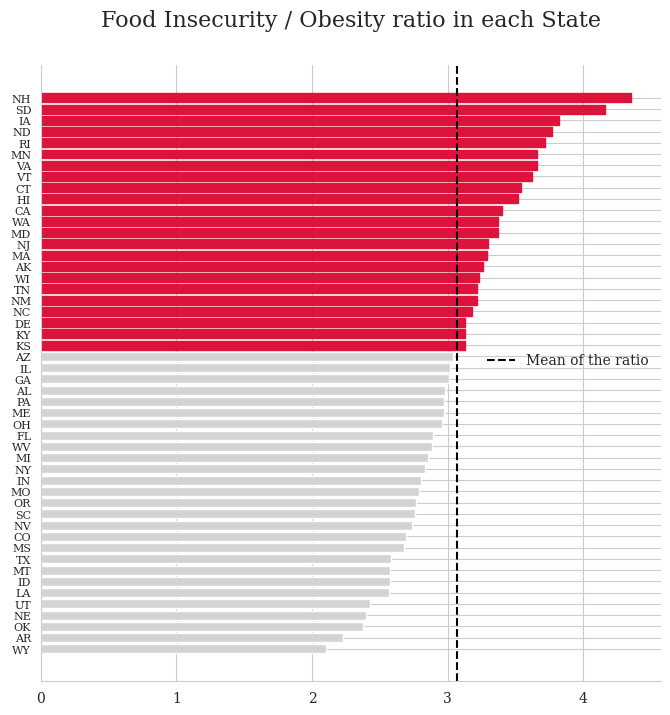

In [38]:
fig = plt.figure(figsize= (8,8))
sns.set_style("whitegrid")
bar = plt.barh(final['Abbreviation'],final['obesity_ins_ratio'], color = 'lightgray')
i = 49
while  i >= 27:
  bar[i].set_color('crimson')
  i = i-1
plt.axvline(final['obesity_ins_ratio'].mean(), label = 'Mean of the ratio', linestyle = 'dashed', color = 'black')
plt.yticks(font = "serif",fontsize =8)
plt.xticks(font = "serif",fontsize =10)
plt.legend(bbox_to_anchor=(1.0,.489),loc='lower right',prop={'size':10,'family':'serif'}, frameon=False)
#plt.text(.9,10,'Mean of the ratio', font = 'serif')
plt.title('Food Insecurity / Obesity ratio in each State', font = "serif", y = 1.05, size = 16)
sns.despine(bottom = False, left = False)
plt.show()

In [39]:
final['obesity_ins_ratio']

46    2.105263
45    2.228916
39    2.377622
48    2.396694
49    2.429907
6     2.565789
42    2.571429
23    2.574257
47    2.580645
11    2.679739
36    2.696629
18    2.735043
44    2.758621
37    2.767857
41    2.786885
31    2.803738
13    2.831858
35    2.857143
25    2.887324
27    2.894737
28    2.956522
33    2.970297
24    2.970297
4     2.983871
10    3.008850
29    3.018868
8     3.039216
16    3.125000
12    3.129771
43    3.130435
9     3.177570
0     3.214286
22    3.217391
32    3.229167
30    3.263158
15    3.294118
26    3.295455
38    3.368421
21    3.373494
19    3.398058
17    3.516484
40    3.541667
7     3.625000
34    3.655914
5     3.661972
2     3.720930
1     3.766234
14    3.820225
3     4.157303
20    4.354839
Name: obesity_ins_ratio, dtype: float64

# **Low Birth Weight:**

In [40]:
conditions_i = [
    (final['2021'] >= 2 )& (final['2021']<=3),
    (final['2021'] > 1.8) & (final['2021'] < 2),
    (final['2021'] > 1.6) & (final['2021'] <= 1.8),
    (final['2021'] > 1.4 ) & (final['2021'] <= 1.6),
     (final['2021'] > 1.2) & (final['2021'] <= 1.4),
    (final['2021'] > 1) & (final['2021'] <= 1.2),
    (final['2021'] > .8 ) & (final['2021'] <= 1),
    (final['2021'] <= .8 )
    ]

values_i = ['Equal to Over 2%', '1.81-1.99%', '1.61-1.8%','1.41-1.6%','1.21-1.4%' ,'1.01-1.2%', '.81-1%','Equal or Below .8%']
final['weight_range'] = np.select(conditions_i, values_i)

In [41]:
event_dictionary = {'Equal to Over 2%':'#660066', '1.81-1.99%':'#800080', '1.61-1.8%':'#be29ec',
                                        '1.41-1.6%':'#d896ff','1.21-1.4%':'#E0B0FF','1.01-1.2%':'#efbbff',
                                        '.81-1%':'#E6E6FA','Equal or Below .8%':'#D7BFDC'}

final['background_colorw'] = final['weight_range'].apply(set_value, args =(event_dictionary, ))
final['background_colorw'] = final['background_colorw'].apply(lambda x: mcolors.to_hex(x))

In [42]:
final['2021'].loc[final['state']=="Louisiana"]

6    2.0
Name: 2021, dtype: float64

In [44]:

legend_order = ['Equal to Over 2%', '1.81-1.99%', '1.61-1.8%','1.41-1.6%','1.21-1.4%' ,'1.01-1.2%', '.81-1%','Equal or Below .8%']
fig = px.choropleth(final, locations = 'Abbreviation',
                    color = 'weight_range',
                    locationmode = 'USA-states',
                    color_discrete_map={'Equal to Over 2%':'crimson', '1.81-2%':'#800080', '1.61-1.8%':'#be29ec',
                                        '1.41-1.6%':'#d896ff','1.21-1.4%':'#E0B0FF','1.01-1.2%':'#efbbff',
                                        '.81-1%':'#E6E6FA','Equal or Below .8%':'#D7BFDC'},
                    category_orders={'weight_range':legend_order},
                    title = "Weight Reduction in New Born By State", hover_data=["state","2020-21", "poverty", "food_ins_pre"])
def calculate_luminance(hex_color):
    try:
        # Strip the '#' symbol if present and convert to lowercase
        hex_color = hex_color.lstrip('#').lower()

        # Make sure the remaining string is a valid hex color code
        if len(hex_color) == 6:
            rgb_color = tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))
            r, g, b = [x / 255.0 for x in rgb_color]
            h, s, v = colorsys.rgb_to_hsv(r, g, b)
            return v
        else:
            # Handle invalid hex color codes
            return None
    except ValueError:
        # Handle errors during conversion
        return None

fig.add_scattergeo(
    locations=final['Abbreviation'],
    locationmode="USA-states",
    text=final['Abbreviation'],
    mode='text', textfont_color=[ 'white' if calculate_luminance(bg_color) < 0.7 else 'black' for bg_color in final['background_colorw']],
    textposition='bottom right',  # Arbitrary coordinates
    showlegend = False
)



fig.update_layout(
                  geo_scope = 'usa',font_family="Times New Roman",
                  title_font_family="Times New Roman",
                  title_font_color="black",

                  height=1000,
                  width=1600 ,legend=dict(title=dict(text='Low Birth Weight By State'), x= .9,y=.7, font_size = 18),
                  title=dict(
                      text="Low Birth Weight by State",
                      xanchor='center',
                      x=0.45,
                      yref='paper',
                      yanchor='bottom',
                      y=.961,
                      pad={'b': 0},
                      font_size = 34))

fig.update_traces(
    marker_line_color='white'#,

   # hovertemplate='%{location}<br>Value: %{color}<br>Label: %{text}'
)
fig.add_annotation(text="Mississippi and Louisiana have the Highest Rates of Low Birth Weight",
                   x=.5,y=.956,
                   showarrow=False, font_size = 24 ,
                   font_color = 'crimson',
                   font_family = 'Helvetica')



fig.show()
fig.write_image("Low Birth Weight by State.png")
files.download('Low Birth Weight by State.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
fig = px.scatter(final, x='food_ins_pre', y='2020-21',
                 trendline='ols')
fig.update_yaxes(range=[0, 42])
fig.update_xaxes(range=[0, 20])
fig.update_layout(template='plotly_white', font_family ='Times New Roman',
                  height=800,xaxis_title="Food Insecurity Percentage",
                  title=dict(text='Food Insecurity Directly Correlates with Child and Teen Obesity', font_size=22, font_color='crimson',
                           font_family='Helvetica'),

yaxis_title="Obesity",# Set the height in pixels
    width=1000)
fig.show()
fig.write_image("Food Insecurity Directly Correlates with Child and Teen Obesity.png")
files.download('Food Insecurity Directly Correlates with Child and Teen Obesity.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
colorscale = ["rgb(255, 51, 51)", "rgb(210, 231, 154)", "rgb(94, 179, 39)", "rgb(67, 136, 33)", "rgb(33, 74, 12)"]

fig = px.choropleth(final, locations = 'Abbreviation',
                    color = '2020-21',
                    locationmode = 'USA-states',
                    color_continuous_scale='reds',
                    title = "Obesity By State", hover_data=["state","2020-21", "poverty", "food_ins_pre"])
fig.add_scattergeo(
    locations=final['Abbreviation'],
    locationmode="USA-states",
    text=final[[
                'Abbreviation']],
    mode='text',
)

fig.update_layout(
                  geo_scope = 'usa',font_family="Times New Roman",
                  title_font_family="Times New Roman",
                  title_font_color="black",

                  height=1000,  # Set the height in pixels
    width=1600 ,font_color = 'darkgreen',legend_title_font_color="black",
coloraxis_colorbar=dict(title='Obesity Percentage')
    )




fig.show()